In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/munmimory/datasets/main/banking.csv', sep=";", encoding="ISO-8859-1", header=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no




*   job: Nghề nghiệp của khách hàng.

*   marital: Tình trạng hôn nhân của khách hàng (single, married, divorced).

*  education: Trình độ học vấn của khách hàng.

*   default: Có nợ xấu hay không (yes, no).

*   balance: Số dư trong tài khoản ngân hàng.
*   housing: Có sở hữu nhà ở hay không (yes, no).
*   loan: Có khoản vay cá nhân hay không (yes, no).
*   contact: Phương thức liên lạc (telephone, cellular, unknown).
*   day: Ngày cuối cùng liên lạc trong tháng.
*   month: Tháng cuối cùng liên lạc trong năm.
*   duration: Thời lượng cuộc gọi cuối cùng (đo lường theo giây).
*   campaign: Số lần tiếp cận trong chiến dịch quảng cáo hiện tại.
*   pdays: Số ngày từ lần liên lạc cuối cùng trong chiến dịch trước.
*   previous: Số lần liên lạc trước đó trước chiến dịch hiện tại.
*   poutcome: Kết quả của chiến dịch tiếp thị trước đó (success, failure,
unknown, other).
*   y: Mục tiêu dự đoán, xác định xem khách hàng có đăng ký gửi tiền hay không (yes, no).















In [ ]:
df.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139.0,1.0,-1.0,0.0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217.0,1.0,-1.0,0.0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,may,380.0,1.0,-1.0,0.0,unknown,no
8,58.0,retired,married,primary,no,121.0,yes,no,unknown,5.0,may,50.0,1.0,-1.0,0.0,unknown,no
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55.0,1.0,-1.0,0.0,unknown,no


In [ ]:
# Xem kích thước của tập dữ liệu
rows, col = df.shape
print ("Dimensions ơf dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions ơf dataset: (46989, 17)
Rows: 46989 
Columns: 17


In [ ]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46989 entries, 0 to 46988
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        46879 non-null  float64
 1   job        46955 non-null  object 
 2   marital    46934 non-null  object 
 3   education  46949 non-null  object 
 4   default    46989 non-null  object 
 5   balance    46965 non-null  float64
 6   housing    46891 non-null  object 
 7   loan       46963 non-null  object 
 8   contact    46949 non-null  object 
 9   day        46961 non-null  float64
 10  month      46947 non-null  object 
 11  duration   46961 non-null  float64
 12  campaign   46969 non-null  float64
 13  pdays      46781 non-null  float64
 14  previous   46925 non-null  float64
 15  poutcome   46913 non-null  object 
 16  y          46989 non-null  object 
dtypes: float64(7), object(10)
memory usage: 6.1+ MB


In [ ]:

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,46879.000000,46965.000000,46961.000000,46961.000000,46969.000000,46781.000000,46925.000000
mean,40.939802,1350.812818,15.591342,258.690211,2.732739,39.797952,0.585168
std,10.645464,3066.520338,8.331809,257.902284,3.052987,99.546813,2.292143
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,440.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1407.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:

df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139.0,1.0,-1.0,0.0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217.0,1.0,-1.0,0.0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,may,380.0,1.0,-1.0,0.0,unknown,no
8,58.0,retired,married,primary,no,121.0,yes,no,unknown,5.0,may,50.0,1.0,-1.0,0.0,unknown,no
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55.0,1.0,-1.0,0.0,unknown,no


In [ ]:
# check giá trị unique của từng thuộc tính
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' nan]
marital
['married' 'single' 'divorced' nan]
education
['tertiary' 'secondary' 'unknown' 'primary' nan]
default
['no' 'yes']
housing
['yes' 'no' nan]
loan
['no' 'yes' nan]
contact
['unknown' 'cellular' 'telephone' nan]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'
 nan]
poutcome
['unknown' nan 'failure' 'other' 'success']
y
['no' 'yes']


In [ ]:
# tìm giá trị bị thiếu
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

age 0.0023  % missing values
job 0.0007  % missing values
marital 0.0012  % missing values
education 0.0009  % missing values
balance 0.0005  % missing values
housing 0.0021  % missing values
loan 0.0006  % missing values
contact 0.0009  % missing values
day 0.0006  % missing values
month 0.0009  % missing values
duration 0.0006  % missing values
campaign 0.0004  % missing values
pdays 0.0044  % missing values
previous 0.0014  % missing values
poutcome 0.0016  % missing values
No missing value found


In [ ]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())


age          110
job           34
marital       55
education     40
default        0
balance       24
housing       98
loan          26
contact       40
day           28
month         42
duration      28
campaign      20
pdays        208
previous      64
poutcome      76
y              0
dtype: int64


<Axes: >

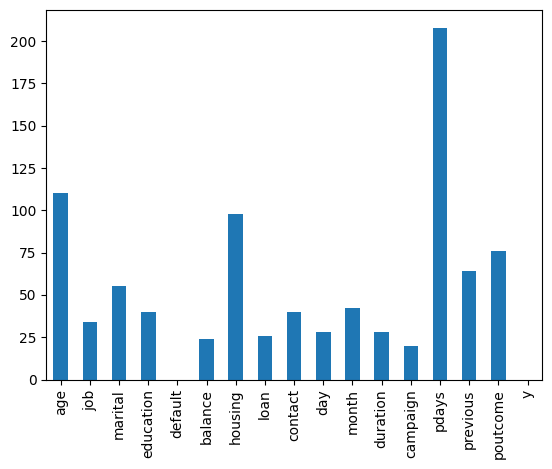

In [ ]:
# trực quan hóa các giá trị còn thiếu
df.isna().sum().plot(kind='bar')

In [ ]:
# Xử lý giá trị thiếu nếu cần
df = df.dropna()

In [ ]:
# Kiểm tra và hiển thị các dòng trùng lặp
print("Các dòng trùng lặp:")
print(df.duplicated().value_counts())

Các dòng trùng lặp:
False    44695
True      1619
dtype: int64


In [ ]:
# Loại bỏ các dòng trùng lặp và giữ lại một dòng đầu tiên
df_no_duplicates =  df.drop_duplicates(subset=None, keep="first", inplace=True)

In [ ]:
# Đếm số giá trị duy nhất trong mỗi cột và in ra

for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7143
housing 2
loan 2
contact 3
day 31
month 12
duration 1571
campaign 47
pdays 545
previous 41
poutcome 4
y 2


In [ ]:
# Tìm các đặc trưng có kiểu dữ liệu là object (chữ) và không phải là cột mục tiêu 'y'
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
# Danh sách các biến số
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# Hiển thị các biến số
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


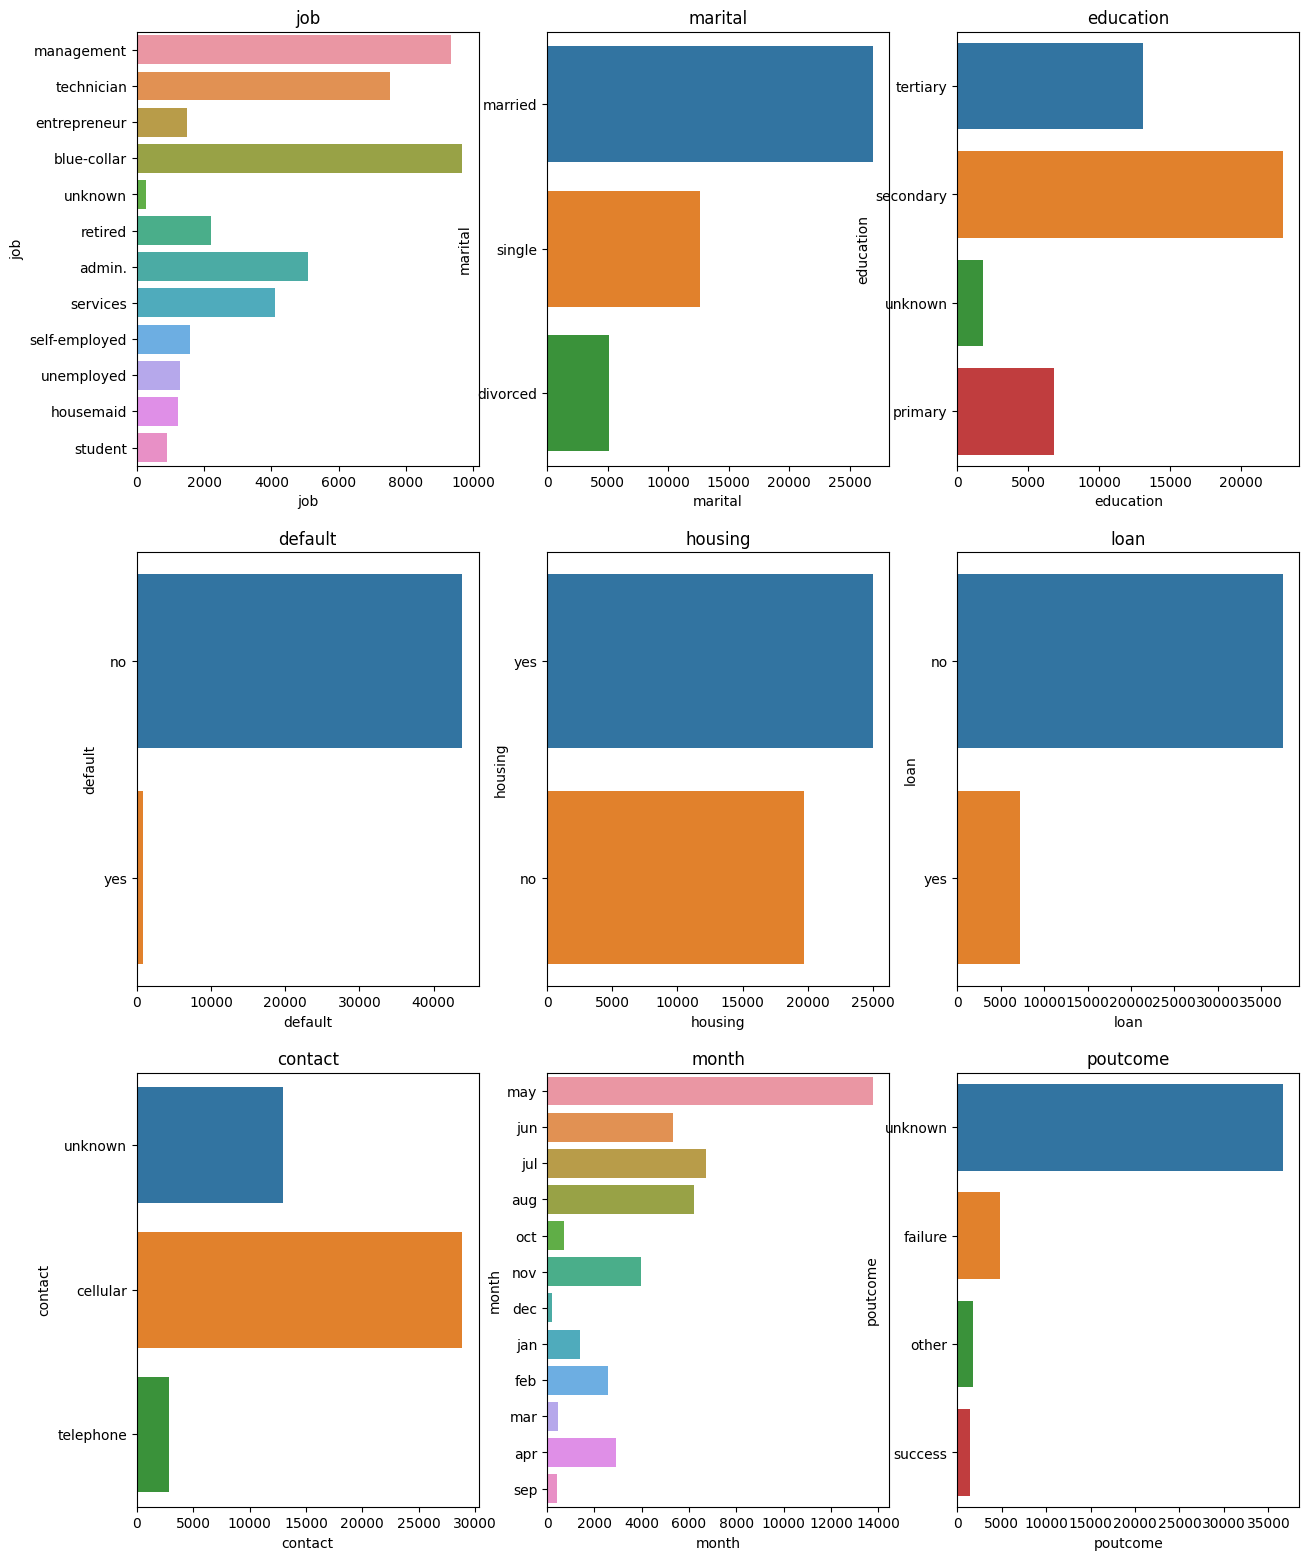

In [ ]:
# Kiểm tra số lượng dựa trên các đặc trưng phân loại
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [ ]:
# Tạo các khoảng tuổi
bins = [18, 30, 40, 50, 60, 70, float('inf')]  # float('inf') để đại diện cho vô cùng, tức là trên 70 tuổi

# Tạo nhãn cho từng khoảng
labels = ['0', '1', '2', '3', '4', '5']

# Thêm cột mới 'age_group' vào DataFrame
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Hiển thị số lượng mẫu trong từng nhóm tuổi
print(df['age_group'].value_counts())

1    17920
2    11545
3     8322
0     5194
4     1193
5      521
Name: age_group, dtype: int64


In [ ]:
# bõ cột age cũ khỏi df
df= df.drop(['age'],axis=1)

Text(0.5, 0, ' age_group')

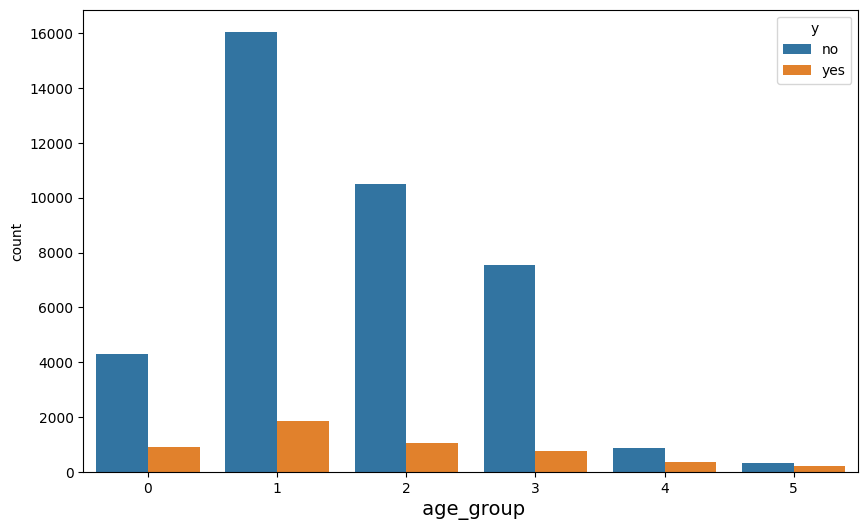

In [ ]:
# tỉ lệ y=yes ở age_group= 0 là từ 18-30 tuổi có tỉ lệ cao nhất 25% so với y= no
plt.figure(figsize=(10,6))
ax = sns.countplot(x='age_group', hue='y', data=df)
ax.set_xlabel(" age_group",fontsize=14)

Text(0.5, 0, ' Tinh trang hon nhan')

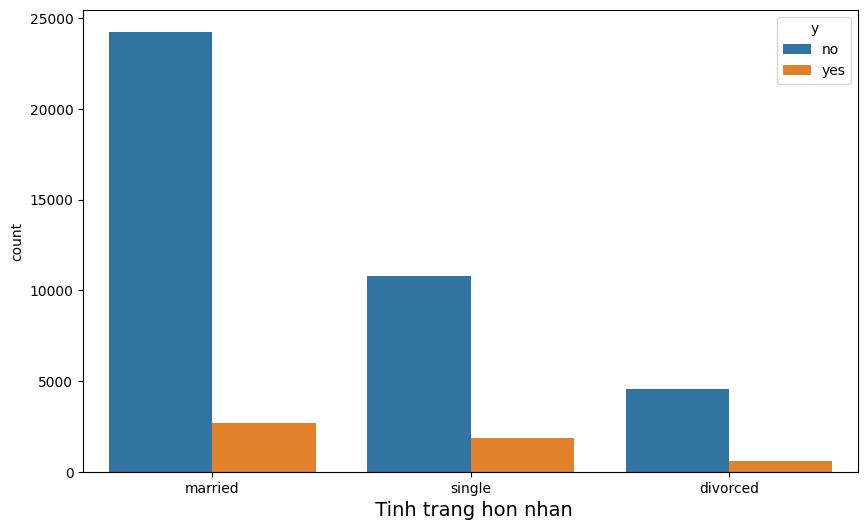

In [ ]:
#Tỷ lệ khách hàng không đăng kí gửi tiền rất cao  ở married là sấp xĩ 10 lần so sới khách hàng đăng kí ,
#còn ở single là gấp gần 6 lần và ở divorced là  gấp gần 7 lần -> tỷ lệ đồng ý ở single  là cao nhất
plt.figure(figsize=(10,6))
ax = sns.countplot(x='marital', hue='y', data=df)
ax.set_xlabel(" Tinh trang hon nhan",fontsize=14)

Text(0.5, 0, ' education')

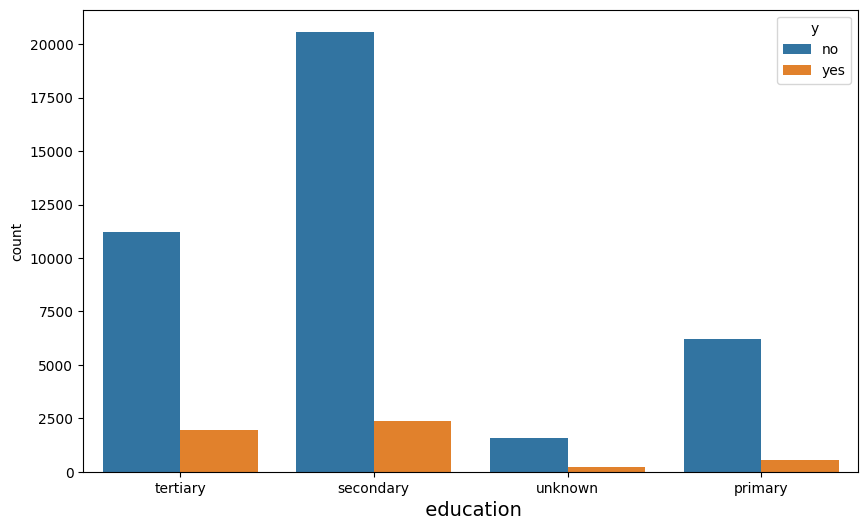

In [ ]:
# tỉ lệ y= yes ở cột tertiary ' học vấn từ cấp 3 trở lên ' là cao nhất là gần 25% so với y=no
plt.figure(figsize=(10,6))
ax = sns.countplot(x='education', hue='y', data=df)
ax.set_xlabel(" education",fontsize=14)

Text(0.5, 0, ' default:')

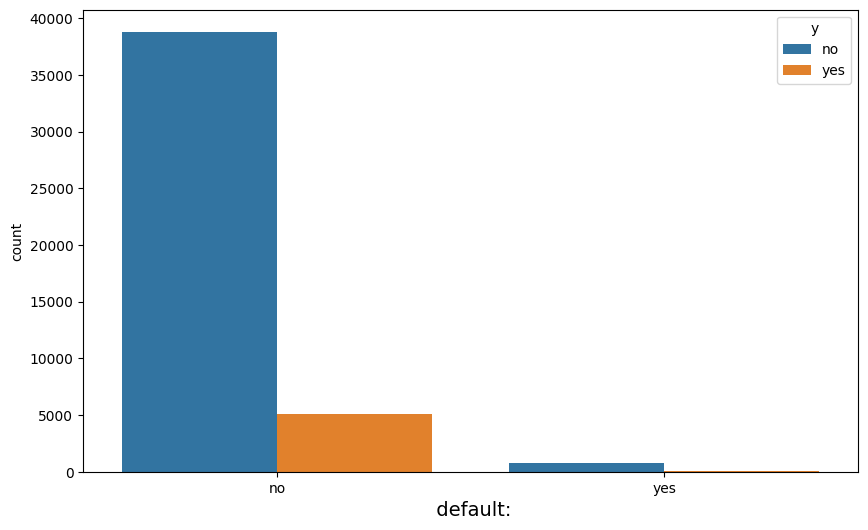

In [ ]:
# ở biểu đồ này chúng ta có thể thấy những người có nợ xấu gần như không gửi tiền ngân hàng và cũng rất ít được liên lạc
plt.figure(figsize=(10,6))
ax = sns.countplot(x='default', hue='y', data=df)
ax.set_xlabel(" default:",fontsize=14)

Text(0.5, 0, ' housing')

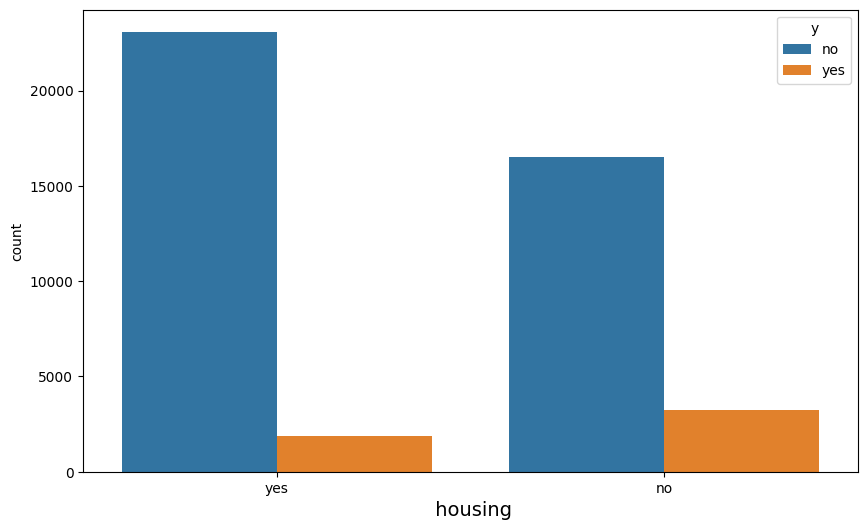

In [ ]:
# những người không sở hữu nhà hay bất động sản có tỉ lệ gửi tiền cao hơn với những người có nhà
plt.figure(figsize=(10,6))
ax = sns.countplot(x='housing', hue='y', data=df)
ax.set_xlabel(" housing",fontsize=14)

Text(0.5, 0, ' loan')

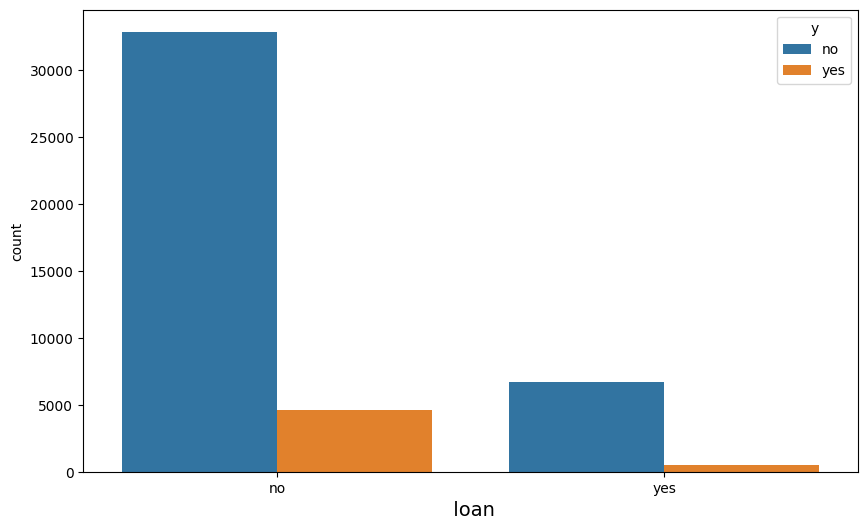

In [ ]:
# những người có khoản vay cá nhân ít được liên hệ hơn là nhưng người không có và tỉ lệ gửi cũng rất thấp ,
#trong khi những người không có khoản vay cá nhân thì tỉ lệ gửi tiền là bằng 1/6 so với những người từ chối gửi
plt.figure(figsize=(10,6))
ax = sns.countplot(x='loan', hue='y', data=df)
ax.set_xlabel(" loan",fontsize=14)

Text(0.5, 0, ' contact')

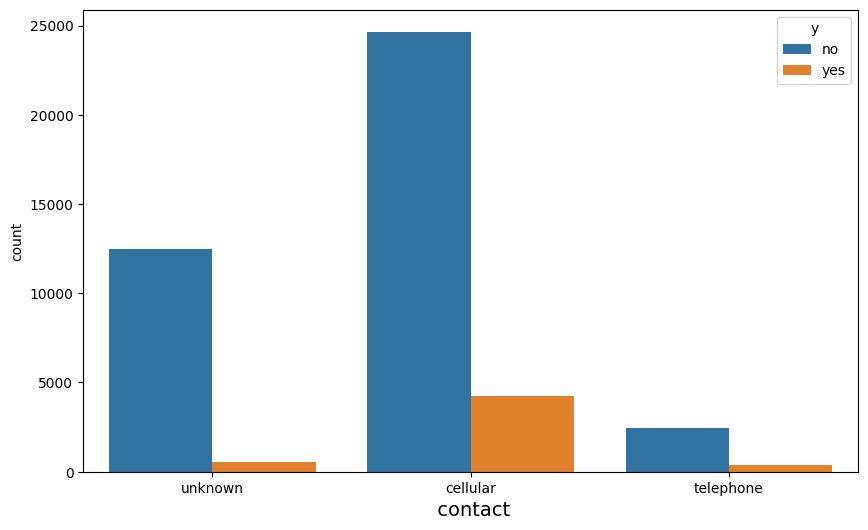

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='contact', hue='y', data=df)
ax.set_xlabel(" contact",fontsize=14)

Text(0.5, 0, ' day')

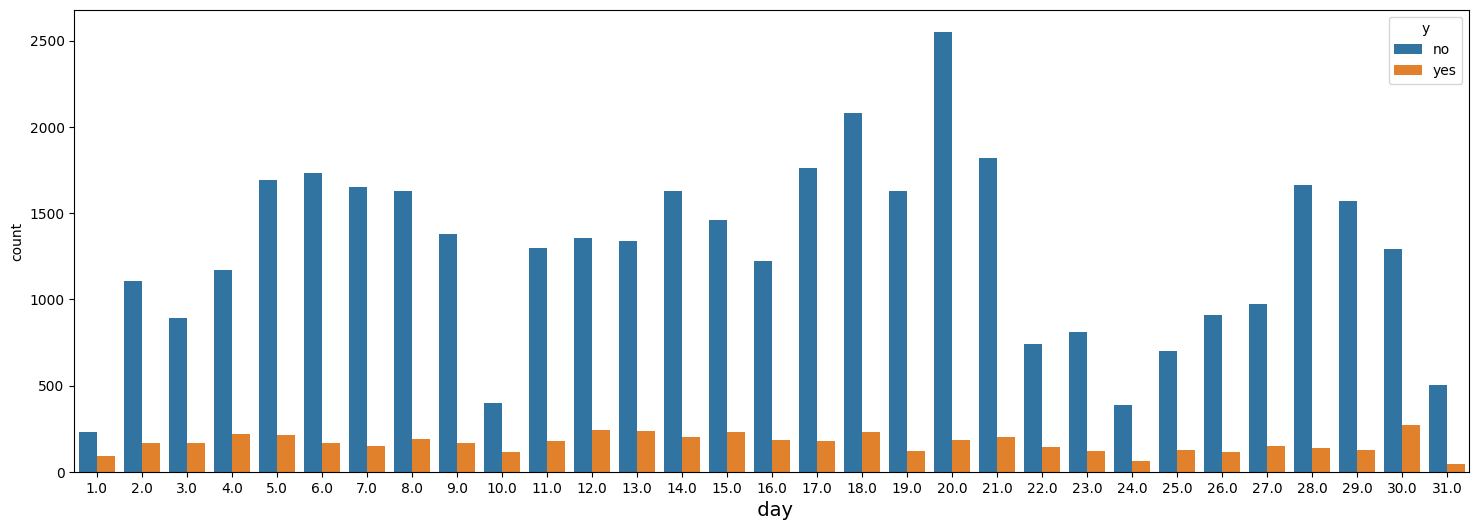

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x='day', hue='y', data=df)
ax.set_xlabel(" day",fontsize=14)

Text(0.5, 0, ' month')

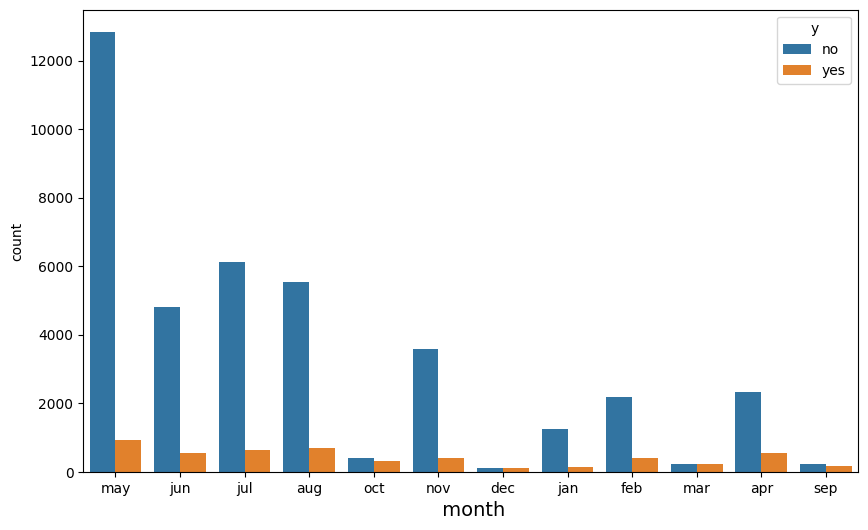

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='month', hue='y', data=df)
ax.set_xlabel(" month",fontsize=14)

In [ ]:
# Bỏ cột "day, month" khỏi tập dữ liệu vì  nó tương tự nhau và đã có thuộc tính pday thay thế ,
# bõ contact vì tất cả khách hàng đều được liên lạc
df= df.drop(['day','month','contact'],axis=1)

<ipython-input-31-dc781124a280>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['y'] == 'no']['duration'], label='Not Subscribed', shade=True)
<ipython-input-31-dc781124a280>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['y'] == 'yes']['duration'], label='Subscribed', shade=True)


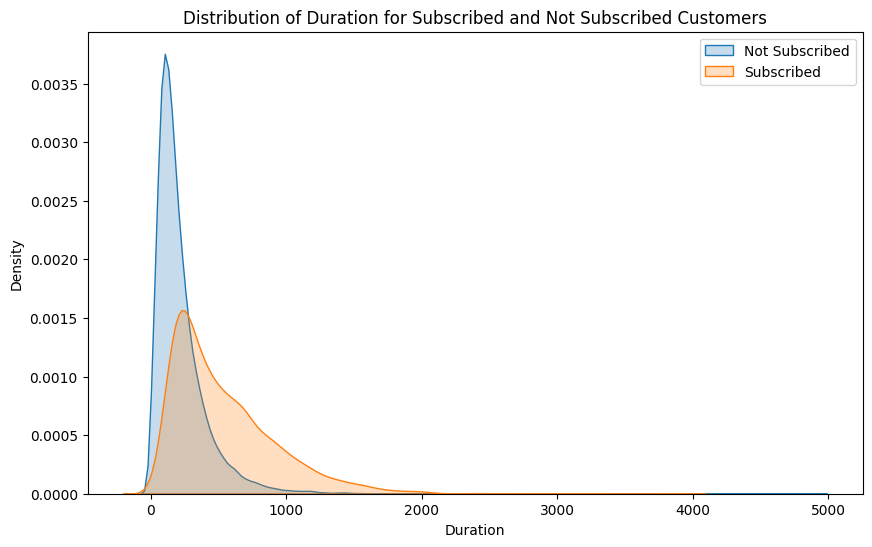

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['y'] == 'no']['duration'], label='Not Subscribed', shade=True)
sns.kdeplot(df[df['y'] == 'yes']['duration'], label='Subscribed', shade=True)

plt.title('Distribution of Duration for Subscribed and Not Subscribed Customers')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

y= yes tập trung ở thời lượng cuộc gọi dao động từ 600 cho đến 1000 tương đương dưới 17p



In [ ]:
Outlinecampaign1 = df[df['duration'] > 4000]
Outlinecampaign1

,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,age_group
24148,technician,married,tertiary,no,6573.0,yes,no,4918.0,1.0,-1.0,0.0,unknown,no,3


ở giá trị từ 4000 cho đến max chỉ có 1 người và họ cũng không đồng ý gửi tiền

<Axes: xlabel='campaign'>

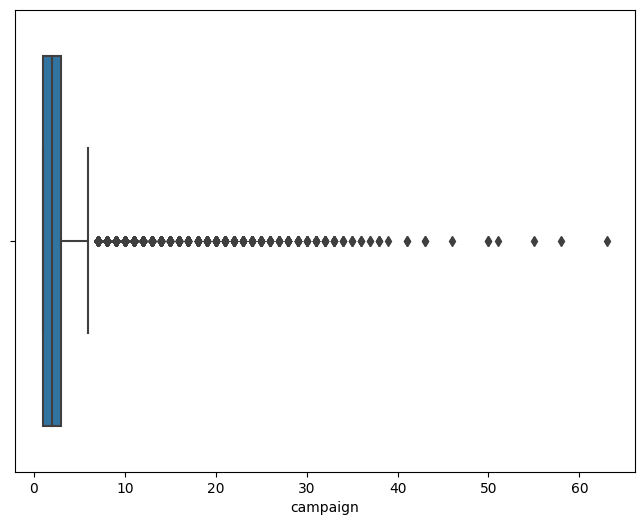

In [ ]:
# Vẽ boxplot của cột 'campaign'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['campaign'])

số lần tiếp cận khách hàng chủ yếu là từ 1-3 lần


In [ ]:

df['campaign'].describe()


count    44695.000000
mean         2.749301
std          3.043957
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

ở campaign 75% của data là từ 3 lần trở xuống trong khi max là 63 lần


In [ ]:
Outlinecampaign = df[df['campaign'] > 30]
Outlinecampaign

,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,age_group
3331,entrepreneur,married,primary,no,461.0,yes,no,651.0,32.0,-1.0,0.0,unknown,yes,3
3483,management,married,tertiary,no,2319.0,yes,no,132.0,32.0,-1.0,0.0,unknown,no,3
3529,blue-collar,married,secondary,no,1140.0,yes,no,241.0,32.0,-1.0,0.0,unknown,no,3
4020,self-employed,married,tertiary,no,1932.0,yes,no,192.0,32.0,-1.0,0.0,unknown,no,2
4275,blue-collar,married,secondary,no,-365.0,yes,no,44.0,43.0,-1.0,0.0,unknown,no,2
4299,management,single,tertiary,no,358.0,yes,no,88.0,51.0,-1.0,0.0,unknown,no,1
4330,management,married,unknown,no,9051.0,yes,no,124.0,63.0,-1.0,0.0,unknown,no,2
4334,blue-collar,married,primary,no,170.0,yes,no,51.0,41.0,-1.0,0.0,unknown,no,2
5073,technician,married,secondary,no,432.0,yes,no,1094.0,55.0,-1.0,0.0,unknown,no,1
5459,blue-collar,married,secondary,no,430.0,yes,no,147.0,50.0,-1.0,0.0,unknown,no,1


ở những người có số lận từ 30 lần trở lên rất ít chỉ có 52 người và chỉ có duy nhất 1 người đồng ý


In [ ]:
campaign = df[(df['campaign'] >= 20) & (df['campaign'] <= 30)]
campaign

,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,age_group
3079,blue-collar,married,primary,no,0.0,no,no,17.0,24.0,-1.0,0.0,unknown,no,0
3475,management,divorced,tertiary,no,497.0,no,no,84.0,22.0,-1.0,0.0,unknown,no,2
3664,management,divorced,secondary,no,773.0,yes,yes,597.0,22.0,-1.0,0.0,unknown,no,4
3914,management,single,tertiary,no,0.0,no,no,16.0,25.0,-1.0,0.0,unknown,no,0
3936,blue-collar,married,secondary,no,351.0,yes,no,76.0,21.0,-1.0,0.0,unknown,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,technician,married,tertiary,no,1.0,no,no,69.0,21.0,-1.0,0.0,unknown,no,1
30917,technician,single,tertiary,no,4987.0,no,no,253.0,21.0,-1.0,0.0,unknown,yes,0
31076,self-employed,married,secondary,no,187.0,no,yes,66.0,21.0,-1.0,0.0,unknown,no,1
31136,student,single,secondary,no,0.0,no,no,209.0,20.0,-1.0,0.0,unknown,yes,0


campaign từ 20-30 thì chỉ có 214 dòng



In [ ]:
# từ thống kê chia chia cột campaign thành 7 group
df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 1, 2, 3, 20, float('inf')],
                              labels=['1', '2', '3', '3-20', '>=20'])


In [ ]:
df.head()

,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,age_group,campaign_group
0,management,married,tertiary,no,2143.0,yes,no,261.0,1.0,-1.0,0.0,unknown,no,3,1
1,technician,single,secondary,no,29.0,yes,no,151.0,1.0,-1.0,0.0,unknown,no,2,1
2,entrepreneur,married,secondary,no,2.0,yes,yes,76.0,1.0,-1.0,0.0,unknown,no,1,1
3,blue-collar,married,unknown,no,1506.0,yes,no,92.0,1.0,-1.0,0.0,unknown,no,2,1
4,unknown,single,unknown,no,1.0,no,no,198.0,1.0,-1.0,0.0,unknown,no,1,1


Text(0.5, 0, ' campaign')

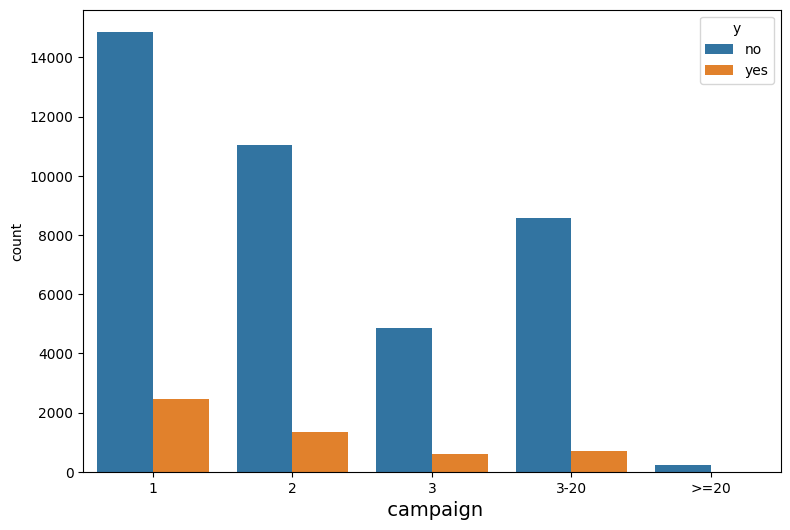

In [ ]:
# tỉ lệ cao nhất ở campaign bằng 1 hơn 1/7 lần
plt.figure(figsize=(9,6))
ax = sns.countplot(x='campaign_group', hue='y', data=df)
ax.set_xlabel(" campaign",fontsize=14)

In [ ]:
# bõ cột cũ
df= df.drop(['campaign'],axis=1)

In [ ]:
df['pdays'].describe()

count    44695.000000
mean        39.586486
std         99.215544
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

cột pday là số ngày trôi qua từ lần liên lạc tập tới 75% là -1


<Axes: xlabel='pdays'>

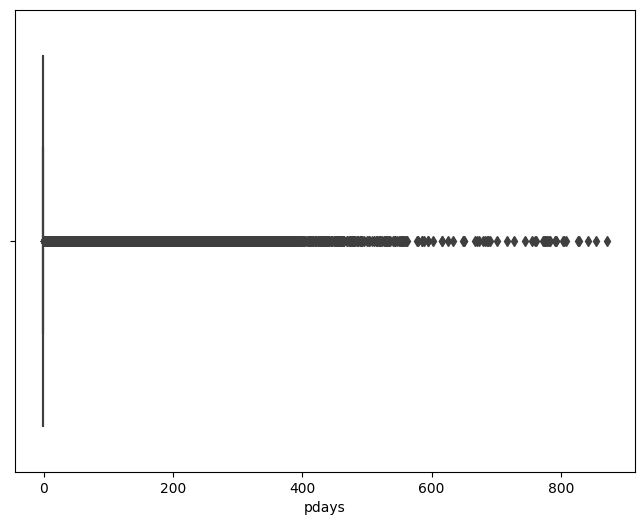

In [ ]:
# Vẽ boxplot của cột 'pdays
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['pdays'])

In [ ]:
Outlinepdays1 = df[df['pdays'] == 12 ]
Outlinepdays1

,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,y,age_group,campaign_group
30839,management,married,tertiary,no,354.0,no,yes,117.0,12.0,2.0,other,no,1,3-20
30841,technician,single,secondary,no,0.0,yes,yes,47.0,12.0,4.0,other,no,1,2
30926,unemployed,single,tertiary,no,0.0,yes,no,102.0,12.0,3.0,other,no,0,3
30927,technician,married,tertiary,no,516.0,yes,no,175.0,12.0,1.0,other,no,2,3-20
30963,unemployed,single,tertiary,no,631.0,no,no,140.0,12.0,1.0,other,no,2,3-20
30965,blue-collar,single,secondary,no,42.0,no,no,473.0,12.0,2.0,other,no,1,3
30998,admin.,married,secondary,no,-229.0,no,no,18.0,12.0,1.0,other,no,3,3


In [ ]:
Outlinepdays1 = df[df['pdays'] == 10 ]
Outlinepdays1

,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,y,age_group,campaign_group
25587,technician,married,secondary,no,1234.0,no,no,109.0,10.0,1.0,failure,no,1,1
26961,technician,married,secondary,no,0.0,no,no,591.0,10.0,1.0,failure,yes,2,1
39390,services,married,secondary,no,1543.0,yes,no,298.0,10.0,6.0,failure,yes,1,1
39527,technician,single,tertiary,no,109.0,yes,yes,601.0,10.0,7.0,failure,yes,1,2
39741,technician,single,secondary,no,7103.0,yes,no,188.0,10.0,1.0,failure,yes,0,3
43645,housemaid,married,primary,no,182.0,no,no,141.0,10.0,10.0,failure,no,4,1


In [ ]:
Outlinepdays = df[df['pdays'] == -1 ]
Outlinepdays

,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,y,age_group,campaign_group
0,management,married,tertiary,no,2143.0,yes,no,261.0,-1.0,0.0,unknown,no,3,1
1,technician,single,secondary,no,29.0,yes,no,151.0,-1.0,0.0,unknown,no,2,1
2,entrepreneur,married,secondary,no,2.0,yes,yes,76.0,-1.0,0.0,unknown,no,1,1
3,blue-collar,married,unknown,no,1506.0,yes,no,92.0,-1.0,0.0,unknown,no,2,1
4,unknown,single,unknown,no,1.0,no,no,198.0,-1.0,0.0,unknown,no,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45702,entrepreneur,single,tertiary,no,1623.0,yes,no,291.0,-1.0,0.0,unknown,yes,1,3
45711,student,single,secondary,no,357.0,no,no,115.0,-1.0,0.0,unknown,no,0,3
45712,student,single,unknown,no,549.0,no,no,154.0,-1.0,0.0,unknown,no,0,1
45713,student,single,secondary,no,2975.0,no,no,799.0,-1.0,0.0,unknown,yes,0,2


Giá trị -1 thường được sử dụng để biểu thị rằng khách hàng chưa từng được tiếp cận trước đó hoặc không có thông tin về lần tiếp cận trước đó.


In [ ]:
df['pdays_group'] = pd.cut(df['pdays'], bins=[-2, 0, 11, 30, 365, float('inf')],
                            labels=['Never contacted', 'Ten days ago', 'Last month', 'Last year', 'More than a year'])

In [ ]:
df.head()

,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,y,age_group,campaign_group,pdays_group
0,management,married,tertiary,no,2143.0,yes,no,261.0,-1.0,0.0,unknown,no,3,1,Never contacted
1,technician,single,secondary,no,29.0,yes,no,151.0,-1.0,0.0,unknown,no,2,1,Never contacted
2,entrepreneur,married,secondary,no,2.0,yes,yes,76.0,-1.0,0.0,unknown,no,1,1,Never contacted
3,blue-collar,married,unknown,no,1506.0,yes,no,92.0,-1.0,0.0,unknown,no,2,1,Never contacted
4,unknown,single,unknown,no,1.0,no,no,198.0,-1.0,0.0,unknown,no,1,1,Never contacted


Text(0.5, 0, 'pdays_group')

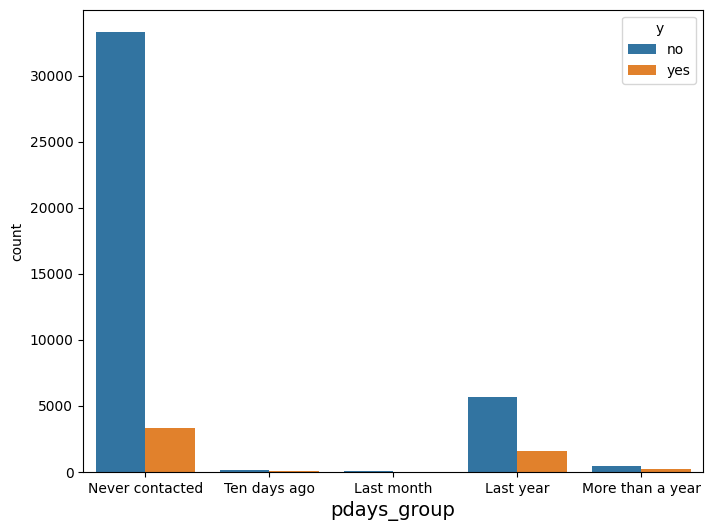

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='pdays_group', hue='y', data=df)
ax.set_xlabel("pdays_group",fontsize=14)

có tỉ lệ cao nhất ở last year bằng 1/3 lần so với y=no

75% ở cột previous  ' số lần liên lạc trước đó ' là = 0

In [ ]:
df['previous'].describe()

count    44695.000000
mean         0.571339
std          2.299684
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

<Axes: xlabel='previous'>

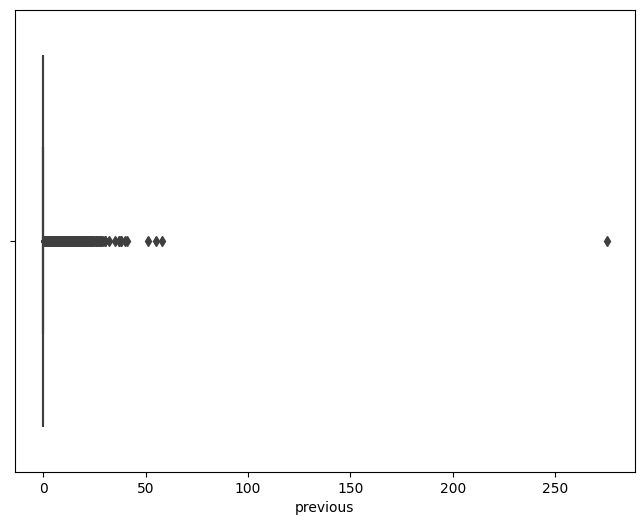

In [ ]:
# Vẽ boxplot của cột previous
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['previous'])

In [ ]:
Outlineprevious = df[df['previous'] == 275 ]
Outlineprevious

,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,y,age_group,campaign_group,pdays_group
29182,management,married,tertiary,no,543.0,yes,no,349.0,262.0,275.0,other,no,2,2,Last year


In [ ]:
# Loại bỏ các dòng có giá trị 'previous' lớn hơn một ngưỡng nào đó
threshold = 100
df = df[df['previous'] <= threshold]

In [ ]:
df['previous'].describe()

count    44694.000000
mean         0.565199
std          1.898302
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64

In [ ]:
Outlineprevious = df[df['previous'] > 30 ]
Outlineprevious

,job,marital,education,default,balance,housing,loan,duration,pdays,previous,poutcome,y,age_group,campaign_group,pdays_group
26668,entrepreneur,married,secondary,no,653.0,yes,no,16.0,112.0,37.0,other,no,3,3-20,Last year
28498,management,single,tertiary,no,145.0,yes,no,57.0,248.0,38.0,failure,no,2,2,Last year
28886,management,single,tertiary,no,358.0,yes,no,68.0,256.0,51.0,failure,no,1,3,Last year
37567,management,married,tertiary,no,0.0,yes,no,11.0,261.0,38.0,failure,no,1,3-20,Last year
38326,blue-collar,married,primary,no,1085.0,yes,yes,523.0,353.0,58.0,other,yes,2,2,Last year
39141,admin.,married,secondary,no,429.0,yes,yes,35.0,349.0,32.0,failure,no,2,3,Last year
42422,student,single,secondary,no,91.0,no,no,157.0,95.0,37.0,other,no,0,3-20,Last year
42611,technician,single,secondary,no,4645.0,yes,no,502.0,270.0,40.0,other,no,1,3,Last year
44089,technician,married,secondary,no,432.0,yes,no,386.0,776.0,55.0,failure,yes,1,3,More than a year
44484,management,single,tertiary,no,6791.0,no,no,361.0,46.0,35.0,failure,no,0,1,Last year


previous >30 tương đối rất ít


In [ ]:
df['previous_group'] = pd.cut(df['previous'], bins=[-1,1,5, 10 ,float('inf')],
                              labels=['0', '1-5', '6-10','>=10'])


Text(0.5, 0, ' previous_group')

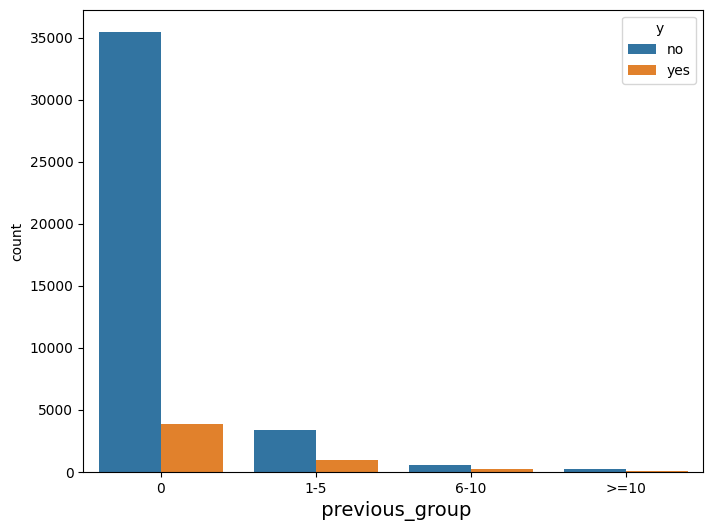

In [ ]:
# tỉ lệ ở cột 6-10 là cao gần bằng 1/2 nhưng số lượng rất ít xếp thứ 2 là cột từ 1-5
# gần bằng 1/3 nhưng vẫn khá ít đông nhất là ở bằng 0 nhưng tỉ lệ y=no ở đây rất cao gấp gần 10 lần so với y= yes
plt.figure(figsize=(8,6))
ax = sns.countplot(x='previous_group', hue='y', data=df)
ax.set_xlabel(" previous_group",fontsize=14)

In [ ]:
df= df.drop(['pdays','previous'],axis=1)

Text(0.5, 0, ' poutcome')

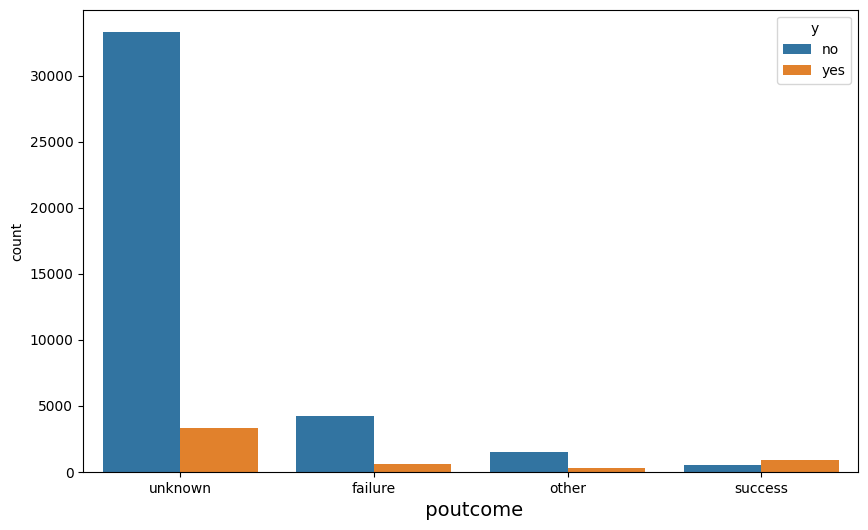

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='poutcome', hue='y', data=df)
ax.set_xlabel(" poutcome",fontsize=14)

ở poutcome 'kết quả chiến dịch trước đó' có kết quả rất khác biệt so với cái thuộc tính ở trước đó. vì ở poutcome = success , nếu có thành công ở chiến lược trước thì tỉ lệ y=yes ở chiến dịch hiện tại cao gấp đôi so với y=no


In [ ]:
df['balance'].describe()

count     44694.000000
mean       1359.800980
std        3049.909002
min       -8019.000000
25%          72.000000
50%         446.000000
75%        1417.750000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='balance'>

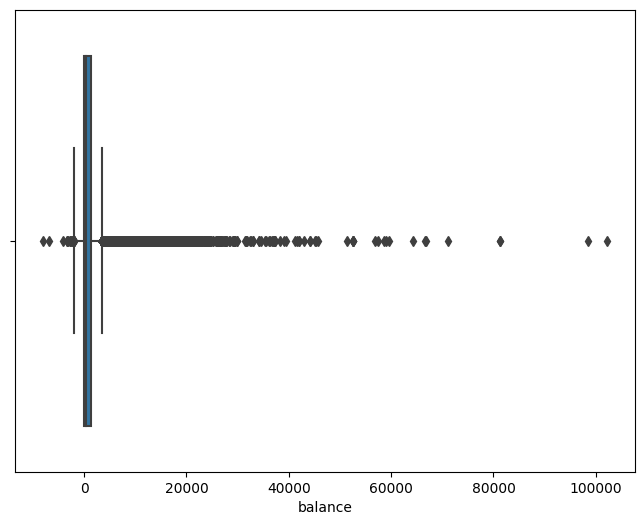

In [ ]:
# Vẽ boxplot của cột balance
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'])

In [ ]:
Outlinebalance0 = df[(df['balance'] == 0)]
Outlinebalance0

,job,marital,education,default,balance,housing,loan,duration,poutcome,y,age_group,campaign_group,pdays_group,previous_group
19,services,married,secondary,no,0.0,yes,no,54.0,unknown,no,1,1,Never contacted,0
24,retired,married,primary,no,0.0,yes,yes,181.0,unknown,no,2,1,Never contacted,0
33,blue-collar,married,secondary,no,0.0,yes,no,226.0,unknown,no,3,1,Never contacted,0
39,admin.,single,secondary,no,0.0,yes,no,137.0,unknown,no,1,1,Never contacted,0
47,technician,married,secondary,no,0.0,yes,no,225.0,unknown,no,2,2,Never contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45131,management,married,tertiary,no,0.0,no,no,508.0,unknown,yes,2,1,Never contacted,0
45134,retired,married,secondary,no,0.0,no,no,258.0,success,yes,5,1,Last year,1-5
45157,technician,married,tertiary,no,0.0,no,no,467.0,failure,yes,3,3,Last year,6-10
45160,technician,married,secondary,no,0.0,yes,no,524.0,success,yes,1,1,Last year,1-5


In [ ]:
Outlinebalance = df[(df['balance'] < 0)]
Outlinebalance

,job,marital,education,default,balance,housing,loan,duration,poutcome,y,age_group,campaign_group,pdays_group,previous_group
25,admin.,married,secondary,no,-372.0,yes,no,172.0,unknown,no,2,1,Never contacted,0
28,management,single,secondary,no,-246.0,yes,no,255.0,unknown,no,2,2,Never contacted,0
36,blue-collar,married,secondary,no,-7.0,yes,no,365.0,unknown,no,0,1,Never contacted,0
37,technician,married,secondary,no,-3.0,no,no,1666.0,unknown,no,3,1,Never contacted,0
45,admin.,single,primary,no,-171.0,yes,no,242.0,unknown,no,1,1,Never contacted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44836,blue-collar,married,primary,no,-195.0,no,no,9.0,unknown,no,1,1,Never contacted,0
44908,management,divorced,tertiary,no,-130.0,yes,no,110.0,failure,no,2,2,Last year,6-10
44964,blue-collar,single,primary,no,-42.0,no,no,5.0,unknown,no,0,1,Never contacted,0
45616,services,married,secondary,no,-52.0,no,no,12.0,unknown,no,1,1,Never contacted,0


số dư tài khoản ngân hàng là âm và =0 khá nhiều


In [ ]:
Outlinebalance1 = df[(df['balance'] > 40000)]
Outlinebalance1

,job,marital,education,default,balance,housing,loan,duration,poutcome,y,age_group,campaign_group,pdays_group,previous_group
446,technician,single,unknown,no,45248.0,yes,no,1623.0,unknown,yes,1,1,Never contacted,0
920,admin.,married,secondary,no,58544.0,yes,no,144.0,unknown,no,2,2,Never contacted,0
3197,admin.,single,secondary,no,56831.0,no,no,243.0,unknown,no,2,1,Never contacted,0
9425,housemaid,divorced,secondary,no,45141.0,no,no,42.0,unknown,no,3,1,Never contacted,0
9536,entrepreneur,married,primary,no,52499.0,no,no,198.0,unknown,no,3,2,Never contacted,0
12926,blue-collar,married,secondary,no,58932.0,no,no,339.0,unknown,no,3,2,Never contacted,0
13154,entrepreneur,married,tertiary,no,51439.0,no,yes,325.0,unknown,no,3,1,Never contacted,0
15869,admin.,single,tertiary,no,45789.0,no,no,21.0,unknown,no,1,>=20,Never contacted,0
19410,entrepreneur,married,tertiary,no,41923.0,no,no,69.0,unknown,no,3,3,Never contacted,0
19420,admin.,married,unknown,no,64343.0,no,no,45.0,unknown,no,3,3-20,Never contacted,0


In [ ]:
# chia balance thành 5 cột
bins = [-float('inf'), 0, 100, 500, 1500, float('inf')]
labels = ['Negative', 'Low', 'Medium', 'High', 'Very High']
df['balance_category'] = pd.cut(df['balance'], bins=bins, labels=labels)


Text(0.5, 0, ' balance\t')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


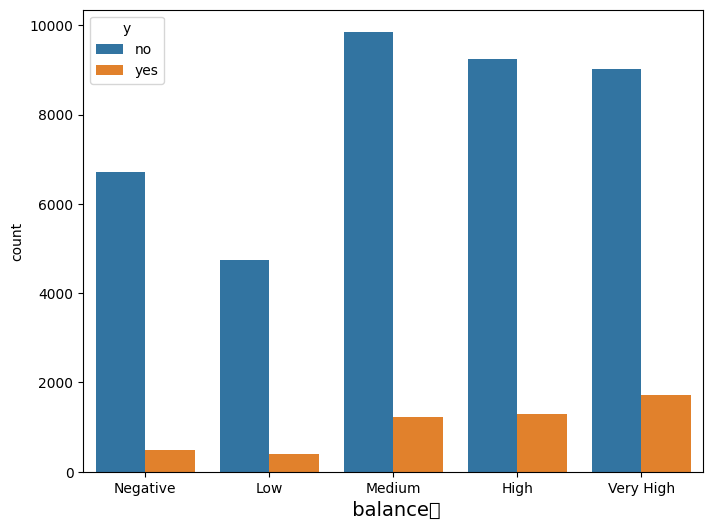

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='balance_category', hue='y', data=df)
ax.set_xlabel(" balance	",fontsize=14)

tỉ lệ thành công ở cột balance = very high khá cao với những cột còn lại

In [ ]:
df.head()

,job,marital,education,default,balance,housing,loan,duration,poutcome,y,age_group,campaign_group,pdays_group,previous_group,balance_category
0,management,married,tertiary,no,2143.0,yes,no,261.0,unknown,no,3,1,Never contacted,0,Very High
1,technician,single,secondary,no,29.0,yes,no,151.0,unknown,no,2,1,Never contacted,0,Low
2,entrepreneur,married,secondary,no,2.0,yes,yes,76.0,unknown,no,1,1,Never contacted,0,Low
3,blue-collar,married,unknown,no,1506.0,yes,no,92.0,unknown,no,2,1,Never contacted,0,Very High
4,unknown,single,unknown,no,1.0,no,no,198.0,unknown,no,1,1,Never contacted,0,Low


In [ ]:
df = df.drop('balance', axis=1)

In [ ]:
# Lấy tên của cột 'y'
y_column = df['y']

# Loại bỏ cột 'y' khỏi DataFrame
df = df.drop('y', axis=1)

# Thêm cột 'y' vào cuối DataFrame
df['y'] = y_column
df.head()

,job,marital,education,default,housing,loan,duration,poutcome,age_group,campaign_group,pdays_group,previous_group,balance_category,y
0,management,married,tertiary,no,yes,no,261.0,unknown,3,1,Never contacted,0,Very High,no
1,technician,single,secondary,no,yes,no,151.0,unknown,2,1,Never contacted,0,Low,no
2,entrepreneur,married,secondary,no,yes,yes,76.0,unknown,1,1,Never contacted,0,Low,no
3,blue-collar,married,unknown,no,yes,no,92.0,unknown,2,1,Never contacted,0,Very High,no
4,unknown,single,unknown,no,no,no,198.0,unknown,1,1,Never contacted,0,Low,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
#chuyển đổi loại dữ liệu cột thành loại dữ liệu chính xác của chúng là int
columns_to_encode = ['job','marital', 'education', 'default', 'housing', 'loan', 'poutcome','age_group','campaign_group','pdays_group','previous_group','balance_category', 'y']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Hiển thị 10 dòng đầu của DataFrame để kiểm tra
print(df.head())


   job  marital  education  default  housing  loan  duration  poutcome  \
0    4        1          2        0        1     0     261.0         3   
1    9        2          1        0        1     0     151.0         3   
2    2        1          1        0        1     1      76.0         3   
3    1        1          3        0        1     0      92.0         3   
4   11        2          3        0        0     0     198.0         3   

   age_group  campaign_group  pdays_group  previous_group  balance_category  y  
0          3               0            3               0                 4  0  
1          2               0            3               0                 1  0  
2          1               0            3               0                 1  0  
3          2               0            3               0                 4  0  
4          1               0            3               0                 1  0  


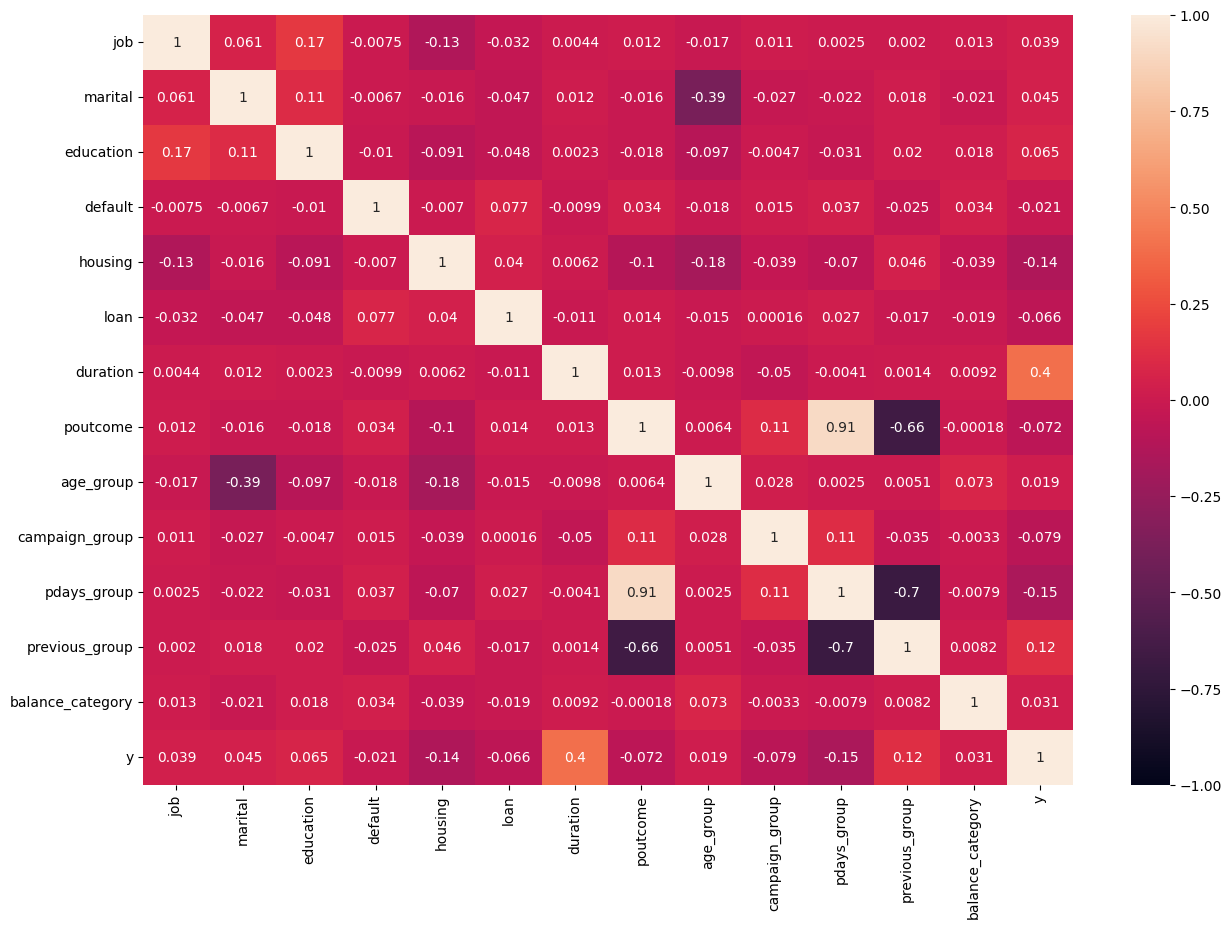

In [ ]:
corr = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

ở heatmap ta có thể thấy được y tương quan thuận cao nhất với duration
tương quan nghịch với pdays

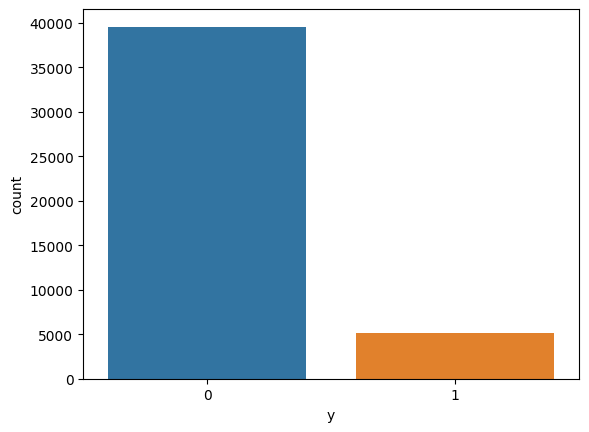

In [ ]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df)
plt.show()

tỉ lệ y=yes chỉ bằng 1/8 so với y=no

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
Y = df['y']
X = df.drop('y', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 42)

In [ ]:
#vòng lặp for Decision Tree
best_accuracy = 0
best_max_depth = None
for depth in range(5,20):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, Y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_true = Y_test,y_pred=y_pred)

    print(f"Max_depth =  {depth}, Accuracy =  {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = depth
print(f"Tỉ lệ cao nhất đạt được là {best_accuracy} với max_depth = {best_max_depth}")

Max_depth =  5, Accuracy =  0.9011857707509882
Max_depth =  6, Accuracy =  0.9008128868670296
Max_depth =  7, Accuracy =  0.8987993138936535
Max_depth =  8, Accuracy =  0.8967857409202774
Max_depth =  9, Accuracy =  0.8980535461257364
Max_depth =  10, Accuracy =  0.8942501305093594
Max_depth =  11, Accuracy =  0.8904467148929823
Max_depth =  12, Accuracy =  0.8882094115892312
Max_depth =  13, Accuracy =  0.8825415765530614
Max_depth =  14, Accuracy =  0.8785144306063092
Max_depth =  15, Accuracy =  0.8759042434185994
Max_depth =  16, Accuracy =  0.8702364083824297
Max_depth =  17, Accuracy =  0.8685957192930122
Max_depth =  18, Accuracy =  0.8633753449175927
Max_depth =  19, Accuracy =  0.857931240211798
Tỉ lệ cao nhất đạt được là 0.9011857707509882 với max_depth = 5


In [ ]:
# xác định mô hình
from sklearn.model_selection import cross_val_score
model_DT = DecisionTreeClassifier(max_depth=5)
# fit mô hình
model_DT.fit(X_train, Y_train)
ypred = model_DT.predict(X_test)
# kiểm tra độ chính xác của mô hình
acc_score = accuracy_score(Y_test, ypred)
print('Độ chính xác:', acc_score)
cross_val = np.mean(cross_val_score(model_DT,X,Y,cv=5))
print('Xác thực chéo:', cross_val)

Độ chính xác: 0.9011857707509882
Xác thực chéo: 0.880363374334651


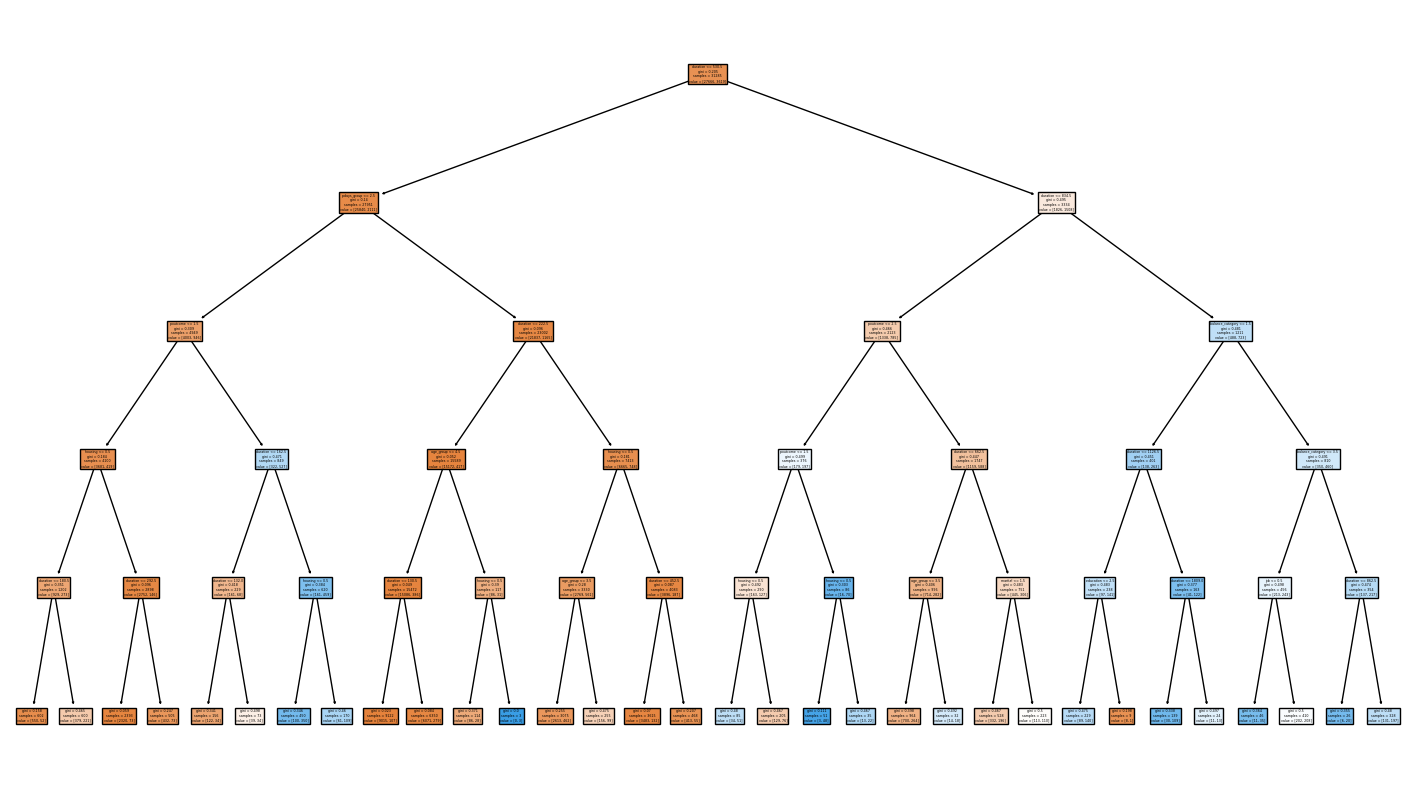

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(18,10))
dot_data = tree.plot_tree(model_DT, feature_names=X.columns,
                   filled=True)

<Figure size 500x500 with 0 Axes>

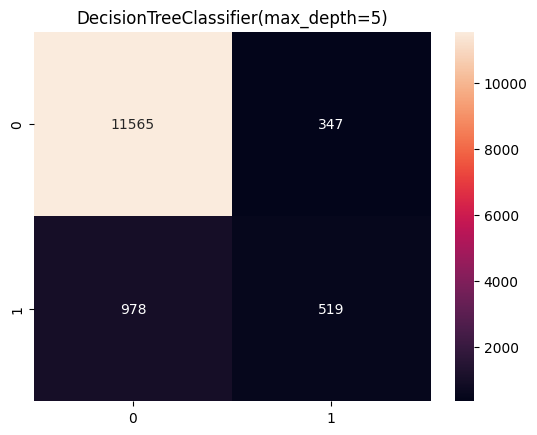

<Figure size 500x500 with 0 Axes>

In [ ]:
cm_DT = confusion_matrix(Y_test, ypred)
sns.heatmap(cm_DT,annot=True, fmt='g').set_title(model_DT)
plt.figure(figsize=(5,5))

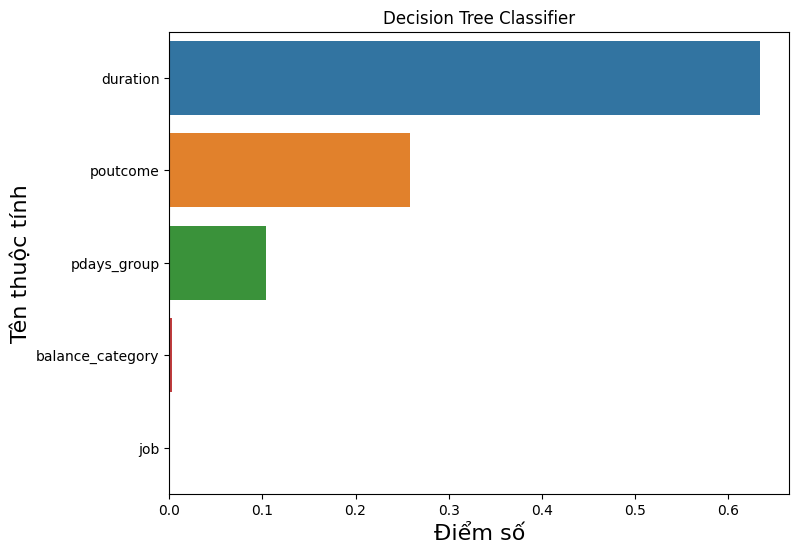

In [ ]:
# Lựa chọn những thuộc tính quan trọng nhất trong một tập dữ liệu
importance = model_DT.feature_importances_
# Tên thuộc tính
names = X.columns
# Biểu đồ
imp_df = pd.DataFrame({'Tên thuộc tính':names, 'Điểm số':importance})
fi = imp_df.sort_values(by='Điểm số', ascending=False).head()
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Điểm số', y='Tên thuộc tính')
plt.xlabel('Điểm số', fontsize=16)
plt.ylabel('Tên thuộc tính', fontsize=16)
plt.title('Decision Tree Classifier')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#vòng lặp for Random Forest
best_accuracy = 0
best_n_estimators  = None
for n_estimators in range(1,120,10):
    clf_forest = RandomForestClassifier(n_estimators=n_estimators)
    clf_forest.fit(X_train, Y_train)
    y_pred_forest = clf_forest.predict(X_test)
    accuracy = accuracy_score(y_true = Y_test,y_pred=y_pred_forest)

    print(f"n_estimators  =  {n_estimators}, Accuracy =  {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators  = n_estimators
print(f"Tỉ lệ cao nhất đạt được là {best_accuracy} với n_estimators  = {best_n_estimators}")

n_estimators  =  1, Accuracy =  0.8641211126855097
n_estimators  =  11, Accuracy =  0.8902229845626072
n_estimators  =  21, Accuracy =  0.8932060556342755
n_estimators  =  31, Accuracy =  0.894100976955776
n_estimators  =  41, Accuracy =  0.8952196286076516
n_estimators  =  51, Accuracy =  0.8952196286076516
n_estimators  =  61, Accuracy =  0.8950704750540681
n_estimators  =  71, Accuracy =  0.8952942053844433
n_estimators  =  81, Accuracy =  0.8946975911701096
n_estimators  =  91, Accuracy =  0.8962637034827354
n_estimators  =  101, Accuracy =  0.8953687821612349
n_estimators  =  111, Accuracy =  0.8946230143933179
Tỉ lệ cao nhất đạt được là 0.8962637034827354 với n_estimators  = 91


In [ ]:
# xác định mô hình Random Forest
model_RF = RandomForestClassifier(n_estimators=91)
# fit mô hình
model_RF.fit(X_train, Y_train)
ypred = model_RF.predict(X_test)
# kiểm tra độ chính xác của mô hình
acc_score = accuracy_score(Y_test, ypred)
print('Độ chính xác:', acc_score)
cross_val = np.mean(cross_val_score(model_RF,X,Y,cv=5))
print('Xác thực chéo:', cross_val)

Độ chính xác: 0.8957416660451936
Xác thực chéo: 0.8681240728819342


In [ ]:
# xác định mô hình Random Forest
model_RF = RandomForestClassifier(n_estimators=71)
# fit mô hình
model_RF.fit(X_train, Y_train)
ypred = model_RF.predict(X_test)
# kiểm tra độ chính xác của mô hình
acc_score = accuracy_score(Y_test, ypred)
print('Độ chính xác:', acc_score)
cross_val = np.mean(cross_val_score(model_RF,X,Y,cv=5))
print('Xác thực chéo:', cross_val)

Độ chính xác: 0.8949958982772764
Xác thực chéo: 0.8662893882259237


In [ ]:
# xác định mô hình Random Forest
model_RF = RandomForestClassifier(n_estimators=71)
# fit mô hình
model_RF.fit(X_train, Y_train)
ypred = model_RF.predict(X_test)
# kiểm tra độ chính xác của mô hình
acc_score = accuracy_score(Y_test, ypred)
print('Độ chính xác:', acc_score)
cross_val = np.mean(cross_val_score(model_RF,X,Y,cv=5))
print('Xác thực chéo:', cross_val)

Độ chính xác: 0.8948467447236931
Xác thực chéo: 0.8699814643348216


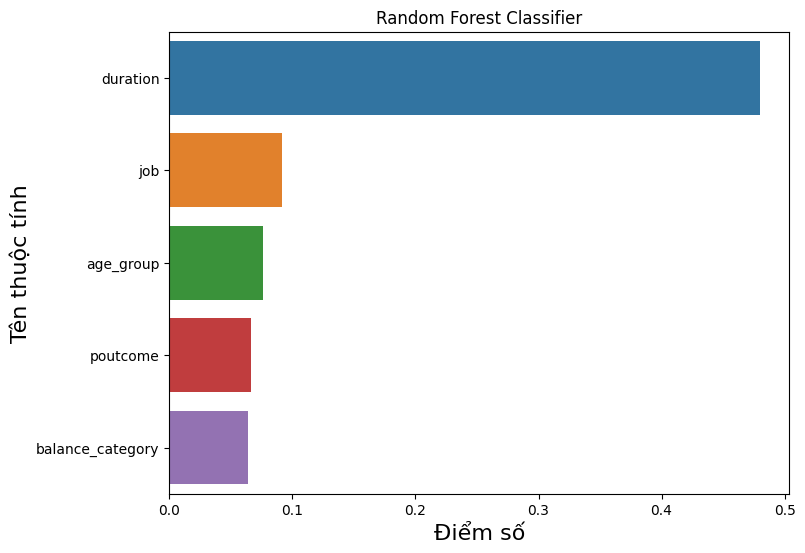

In [ ]:
# Lựa chọn những thuộc tính quan trọng nhất
importance = model_RF.feature_importances_
# Tên thuộc tính
names = X.columns
# Biểu đồ
imp_df = pd.DataFrame({'Tên thuộc tính':names, 'Điểm số':importance})
fi = imp_df.sort_values(by='Điểm số', ascending=False).head()
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Điểm số', y='Tên thuộc tính')
plt.xlabel('Điểm số', fontsize=16)
plt.ylabel('Tên thuộc tính', fontsize=16)
plt.title('Random Forest Classifier')
plt.show()

RANDOM FOREST


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 42)

In [ ]:
#vòng lặp for Random Forest
best_accuracy = 0
best_n_estimators  = None
for n_estimators in range(10,150,10):
    clf_forest = RandomForestClassifier(n_estimators=n_estimators)
    clf_forest.fit(X_train, Y_train)
    y_pred_forest = clf_forest.predict(X_test)
    accuracy = accuracy_score(y_true = Y_test,y_pred=y_pred_forest)

    print(f"n_estimators  =  {n_estimators}, Accuracy =  {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators  = n_estimators
print(f"Tỉ lệ cao nhất đạt được là {best_accuracy} với n_estimators  = {best_n_estimators}")

n_estimators  =  10, Accuracy =  0.8932806324110671
n_estimators  =  20, Accuracy =  0.8933552091878589
n_estimators  =  30, Accuracy =  0.8925348646431501
n_estimators  =  40, Accuracy =  0.8949958982772764
n_estimators  =  50, Accuracy =  0.8958162428219852
n_estimators  =  60, Accuracy =  0.8941755537325676
n_estimators  =  70, Accuracy =  0.8943992840629428
n_estimators  =  80, Accuracy =  0.8971586248042359
n_estimators  =  90, Accuracy =  0.8969348944738609
n_estimators  =  100, Accuracy =  0.8955179357148184
n_estimators  =  110, Accuracy =  0.8946230143933179
n_estimators  =  120, Accuracy =  0.8952196286076516
n_estimators  =  130, Accuracy =  0.8954433589380267
n_estimators  =  140, Accuracy =  0.8967857409202774
Tỉ lệ cao nhất đạt được là 0.8971586248042359 với n_estimators  = 80


In [ ]:
# xác định mô hình Random Forest
model_RF = RandomForestClassifier(n_estimators=90)
# fit mô hình
model_RF.fit(X_train, Y_train)
ypred = model_RF.predict(X_test)
# kiểm tra độ chính xác của mô hình
acc_score = accuracy_score(Y_test, ypred)
print('Độ chính xác:', acc_score)
cross_val = np.mean(cross_val_score(model_RF,X,Y,cv=5))
print('Xác thực chéo:', cross_val)

Độ chính xác: 0.8956670892684018
Xác thực chéo: 0.8694219173933689


<Figure size 500x500 with 0 Axes>

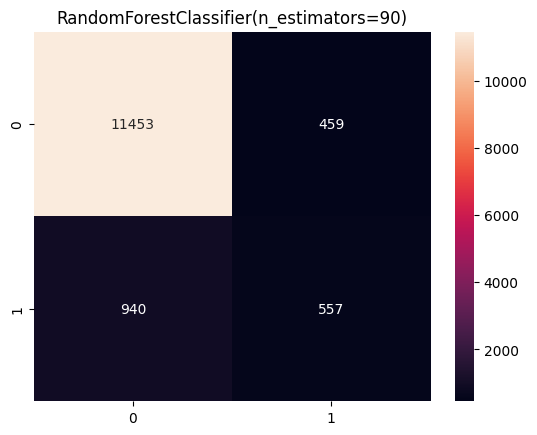

<Figure size 500x500 with 0 Axes>

In [ ]:
cm_RF = confusion_matrix(Y_test, ypred)
sns.heatmap(cm_RF,annot=True, fmt='g').set_title(model_RF)
plt.figure(figsize=(5,5))

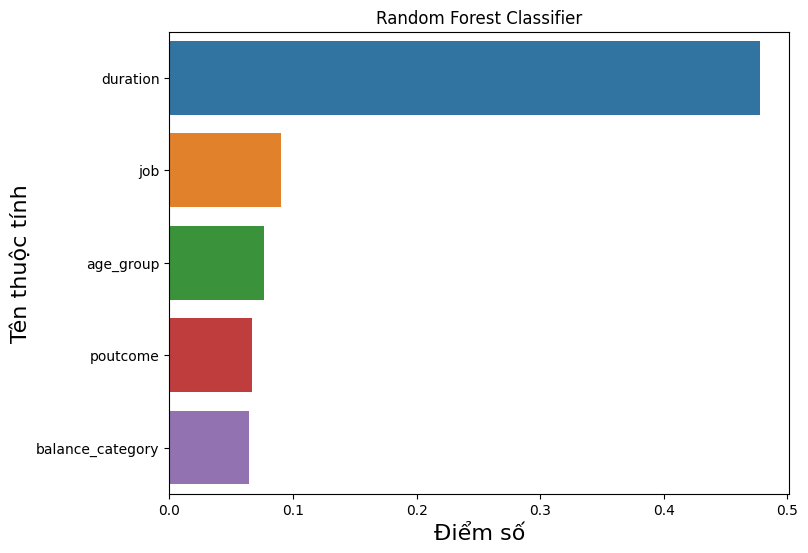

In [ ]:
# Lựa chọn những thuộc tính quan trọng nhất
importance = model_RF.feature_importances_
# Tên thuộc tính
names = X.columns
# Biểu đồ
imp_df = pd.DataFrame({'Tên thuộc tính':names, 'Điểm số':importance})
fi = imp_df.sort_values(by='Điểm số', ascending=False).head()
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Điểm số', y='Tên thuộc tính')
plt.xlabel('Điểm số', fontsize=16)
plt.ylabel('Tên thuộc tính', fontsize=16)
plt.title('Random Forest Classifier')
plt.show()

Naive Bayes


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:

clf=GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Xác định mô hình Naive Bayes
model_NB = GaussianNB()

# Fit mô hình
model_NB.fit(X_train, Y_train)

# Dự đoán trên tập kiểm thử
ypred_NB = model_NB.predict(X_test)

# Kiểm tra độ chính xác của mô hình
acc_score_NB = accuracy_score(Y_test, ypred_NB)
print('Độ chính xác của Naive Bayes:', acc_score_NB)

# Xác thực chéo
cross_val_NB = np.mean(cross_val_score(model_NB, X_train, Y_train, cv=5))
print('Xác thực chéo của Naive Bayes:', cross_val_NB)


Độ chính xác của Naive Bayes: 0.8412260422104557
Xác thực chéo của Naive Bayes: 0.848809333546428


In [ ]:
Y_pred = clf.predict(X_test)
#print(classification_report(y_test, y_pred))
acc_score = accuracy_score(Y_test, y_pred)
print('Độ chính xác:', acc_score)

Độ chính xác: 0.857931240211798


test_score 0.8412260422104557


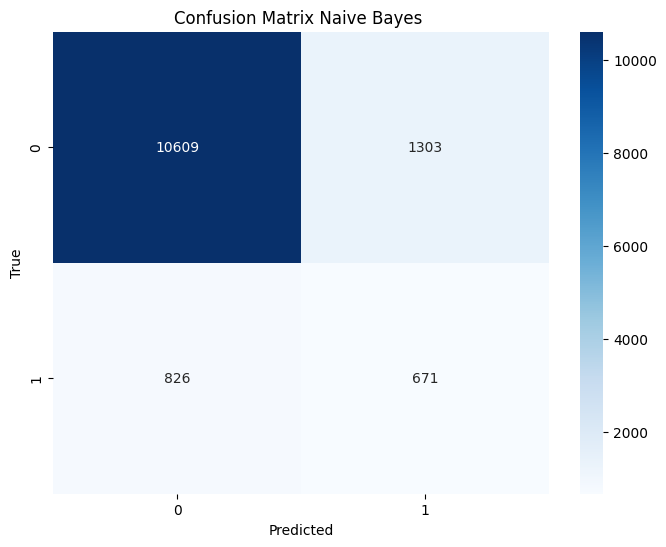

In [ ]:
from sklearn.naive_bayes import GaussianNB
import time
# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()
# Train the model
start_timeNB = time.time()
naive_bayes.fit(X_train, Y_train)
end_timeNB = time.time()
# Make predictions
start_timeNBP = time.time()
y_predNB = naive_bayes.predict(X_test)
end_timeNBP = time.time()
scoreNB = naive_bayes.score(X_test, Y_test)
print("test_score",scoreNB)
# Create a confusion matrix
cmNB = confusion_matrix(Y_test, y_predNB)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cmNB, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes ')
plt.show()

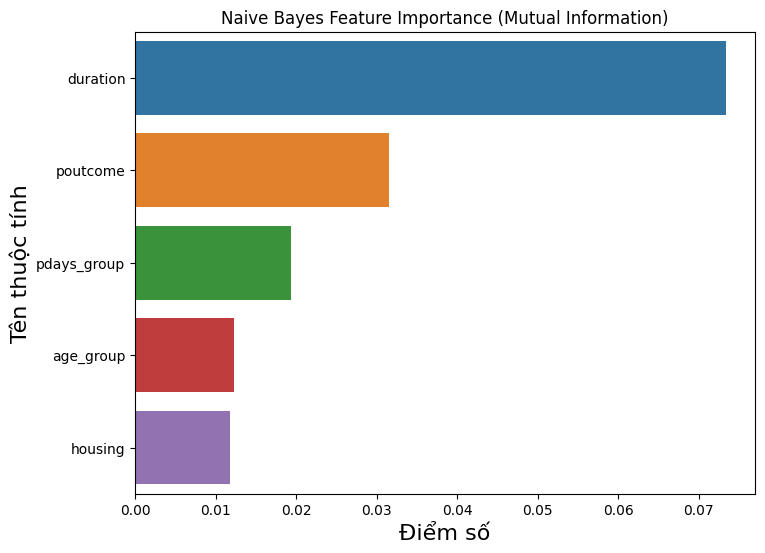

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Tính độ quan trọng giả định cho Naive Bayes bằng mutual information
importance = mutual_info_classif(X_train, Y_train, discrete_features='auto', random_state=42)
names = X_train.columns

# Biểu đồ
imp_df = pd.DataFrame({'Tên thuộc tính': names, 'Điểm số': importance})
fi = imp_df.sort_values(by='Điểm số', ascending=False).head()
plt.figure(figsize=(8, 6))
sns.barplot(data=fi, x='Điểm số', y='Tên thuộc tính')
plt.xlabel('Điểm số', fontsize=16)
plt.ylabel('Tên thuộc tính', fontsize=16)
plt.title('Naive Bayes Feature Importance (Mutual Information)')
plt.show()


test


test_df= pd.read_csv('hhttps://raw.githubusercontent.com/munmimory/datasets/main/bank.csv', sep=";", encoding="ISO-8859-1", header=0)
test_df.head()

In [ ]:
test_df= pd.read_csv('https://raw.githubusercontent.com/munmimory/datasets/main/bank.csv', sep=";", encoding="ISO-8859-1", header=0)
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# Tạo các khoảng tuổi
bins = [18, 30, 40, 50, 60, 70, float('inf')]  # float('inf') để đại diện cho vô cùng, tức là trên 70 tuổi

# Tạo nhãn cho từng khoảng
labels = ['0', '1', '2', '3', '4', '5']

# Thêm cột mới 'age_group' vào DataFrame
test_df['age_group'] = pd.cut(test_df['age'], bins=bins, labels=labels, right=False)

# Hiển thị số lượng mẫu trong từng nhóm tuổi
print(test_df['age_group'].value_counts())

1    1808
2    1203
3     854
0     482
4     113
5      61
Name: age_group, dtype: int64


In [ ]:
# bõ cột age cũ khỏi df
test_df= test_df.drop(['age'],axis=1)

In [ ]:
# Bỏ cột "day, month" khỏi tập dữ liệu vì  nó tương tự nhau và đã có thuộc tính pday thay thế , bõ contact vì tất cả khách hàng đều được liên lạc
test_df= test_df.drop(['day','month','contact'],axis=1)

In [ ]:
# từ thống kê chia chia cột campaign thành 7 group
test_df['campaign_group'] = pd.cut(test_df['campaign'], bins=[0, 1, 2, 3, 10, 20, 30, float('inf')],
                              labels=['1', '2', '3', '3-10', '10-20', '20-30', '>=30'])


In [ ]:
# bõ cột cũ
test_df= test_df.drop(['campaign'],axis=1)

In [ ]:
test_df['pdays_group'] = pd.cut(test_df['pdays'], bins=[-2, 0, 11, 30, 365, float('inf')],
                            labels=['Never contacted', 'Ten days ago', 'Last month', 'Last year', 'More than a year'])

In [ ]:
test_df['previous_group'] = pd.cut(test_df['previous'], bins=[-1,1,5, 10 ,float('inf')],
                              labels=['0', '1-5', '6-10','>=10'])


In [ ]:
test_df= test_df.drop(['pdays','previous'],axis=1)

In [ ]:
# chia balance thành 5 cột
bins = [-float('inf'), 0, 100, 500, 1500, float('inf')]
labels = ['Negative', 'Low', 'Medium', 'High', 'Very High']
test_df['balance_category'] = pd.cut(test_df['balance'], bins=bins, labels=labels)


In [ ]:
test_df = test_df.drop(['balance'],axis=1)

In [ ]:
# Lấy tên của cột 'y'
y_column = test_df['y']

# Loại bỏ cột 'y' khỏi DataFrame
test_df = test_df.drop('y', axis=1)

# Thêm cột 'y' vào cuối DataFrame
test_df['y'] = y_column
test_df.head()

,job,marital,education,default,housing,loan,duration,poutcome,age_group,campaign_group,pdays_group,previous_group,balance_category,y
0,unemployed,married,primary,no,no,no,79,unknown,1,1,Never contacted,0,Very High,no
1,services,married,secondary,no,yes,yes,220,failure,1,1,Last year,1-5,Very High,no
2,management,single,tertiary,no,yes,no,185,failure,1,1,Last year,0,High,no
3,management,married,tertiary,no,yes,yes,199,unknown,1,3-10,Never contacted,0,High,no
4,blue-collar,married,secondary,no,yes,no,226,unknown,3,1,Never contacted,0,Negative,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
#chuyển đổi loại dữ liệu cột thành loại dữ liệu chính xác của chúng là int
columns_to_encode = ['job','marital', 'education', 'default', 'housing', 'loan', 'poutcome','age_group','campaign_group','pdays_group','previous_group','balance_category', 'y']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    test_df[column] = label_encoder.fit_transform(test_df[column])

# Hiển thị 10 dòng đầu của DataFrame để kiểm tra
print(test_df.head())

   job  marital  education  default  housing  loan  duration  poutcome  \
0   10        1          0        0        0     0        79         3   
1    7        1          1        0        1     1       220         0   
2    4        2          2        0        1     0       185         0   
3    4        1          2        0        1     1       199         3   
4    1        1          1        0        1     0       226         3   

   age_group  campaign_group  pdays_group  previous_group  balance_category  y  
0          1               0            3               0                 4  0  
1          1               0            1               1                 4  0  
2          1               0            1               0                 0  0  
3          1               5            3               0                 0  0  
4          3               0            3               0                 3  0  


In [ ]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

job                 0
marital             0
education           0
default             0
housing             0
loan                0
duration            0
poutcome            0
age_group           0
campaign_group      0
pdays_group         0
previous_group      0
balance_category    0
y                   0
dtype: int64


In [ ]:
Y_test_df = test_df['y']
X_test_df = test_df.drop('y', axis=1)


In [ ]:
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(X_test_df, Y_test_df, test_size= 0.3, random_state = 42)

In [ ]:
# In tên cột của dữ liệu huấn luyện
print("Tên cột của dữ liệu huấn luyện:", X_train.columns)

# In tên cột của dữ liệu kiểm thử
print("Tên cột của dữ liệu kiểm thử:", X_test_df.columns)


Tên cột của dữ liệu huấn luyện: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'duration',
       'poutcome', 'age_group', 'campaign_group', 'pdays_group',
       'previous_group', 'balance_category'],
      dtype='object')
Tên cột của dữ liệu kiểm thử: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'duration',
       'poutcome', 'age_group', 'campaign_group', 'pdays_group',
       'previous_group', 'balance_category'],
      dtype='object')


In [ ]:
# Sử dụng dữ liệu kiểm thử đã tạo
dt_predictions_test = model_DT.predict(X_test_df)
dt_accuracy_test = accuracy_score(Y_test_df, dt_predictions_test)
print('Decision Tree Accuracy on Test Data:', dt_accuracy_test)


Decision Tree Accuracy on Test Data: 0.8916728076639646


In [ ]:
# Sử dụng dữ liệu kiểm thử đã tạo
rf_predictions_test = model_RF.predict(X_test_df)
rf_accuracy_test = accuracy_score(Y_test_df, rf_predictions_test)
print('Random Forest Accuracy on Test Data:', rf_accuracy_test)


Random Forest Accuracy on Test Data: 0.9521002210759028


In [ ]:


nb_predictions_test = model_NB.predict(X_test_df)
nb_accuracy_test = accuracy_score(Y_test_df, nb_predictions_test)
print('Naive Bayes Accuracy on Test Data:', nb_accuracy_test)


Naive Bayes Accuracy on Test Data: 0.8489314664701547
